In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def f(x):
    return x**3 + 2*x - 2*x**2 - 0.25*x**4
def f1(x):
    return 3*x**2 + 2 - 4*x - x**3
def f2(x):
    return 6*x - 4 - 3*x**2

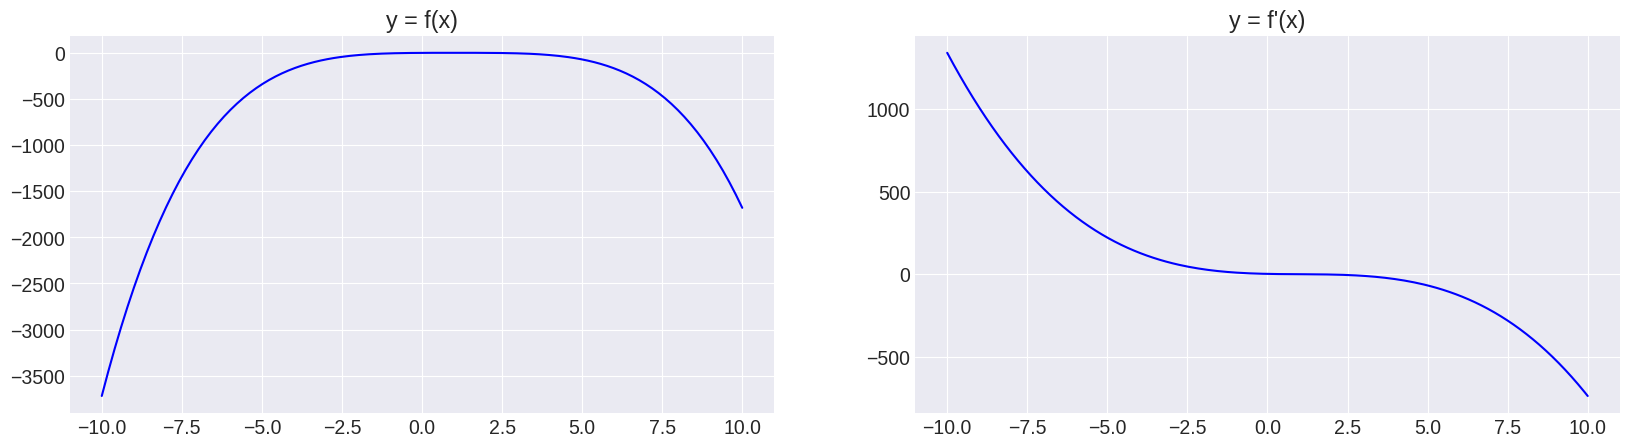

In [3]:
# Visualizzazione
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams.update({'font.size': 14})
plt.style.use("seaborn-darkgrid")
x = np.linspace(-10, 10, 200)
fig, axs = plt.subplots(1, 2)
axs[0].plot(x, f(x), 'b')
axs[0].set_title("y = f(x)")
axs[1].plot(x, f1(x), 'b')
axs[1].set_title("y = f'(x)")
fig.set_dpi(100)
plt.savefig('foo.png', bbox_inches='tight')

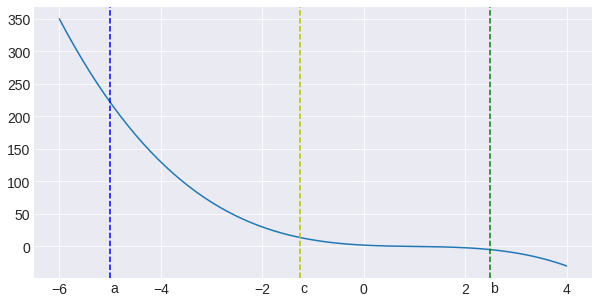

In [4]:
x = np.linspace(-6, 4, 200)
plt.figure(figsize = (10, 5))
plt.plot(x, f1(x))
plt.axvline(x = -5, color = 'b', label = 'a', linestyle='--')
plt.axvline(x = 2.5, color = 'g', label = 'b', linestyle='--')
plt.axvline(x = -1.25, color = 'y', label = 'c', linestyle='--')
plt.text(-5,-70,'a')
plt.text(2.5,-70,'b')
plt.text(-1.25,-70,'c')

plt.show()

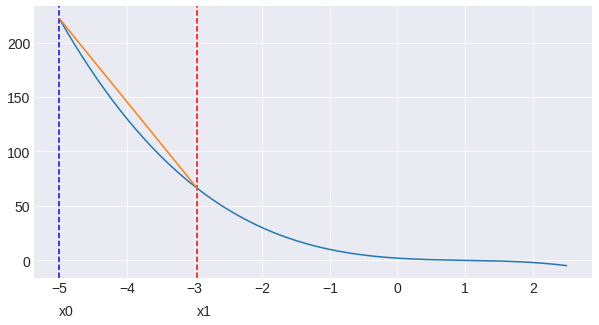

In [5]:
#tangenti
x = np.linspace(-5, 2.5, 200)
plt.figure(figsize = (10, 5))
plt.plot(x, f1(x))
plt.axvline(x = -5, color = 'b', label = 'x0', linestyle='--')
plt.axvline(x = -2.96, color = 'r', label = 'x1', linestyle='--')
plt.text(-5,-50,'x0')
plt.text(-2.96,-50,'x1')
plt.plot([-5, -2.96],[222, 66])
plt.show()

In [6]:
# Metodo della Bisezione
def metodo_bisezione(func, a, b, threshold, max_iter, verbose):
    if np.sign(func(a)) == np.sign(func(b)):
        print('Impossibile eseguire il metodo della bisezione')
        quit()
    for i in range(max_iter):
        c = (a+b) / 2

        if verbose:
            print(f"# Iterazione: {i}, x = {c:.7f}, f'(x) = {func(c):.7f}")

        'Check conditions'
        if func(c) == 0 or np.abs(func(c)) < threshold:
            return c, i + 1
        elif np.sign(func(a)) == np.sign(func(c)):
            a = c
        elif np.sign(func(b)) == np.sign(func(c)):
            b = c
    print('Raggiunto il numero massimo di iterazioni')
    return c, i + 1

c, iters = metodo_bisezione(f1, -5.0, 2.5, 0.00001, 1000, True)
print(f'Valore: {c:.7f}')
print(f'Numero iterazioni: {iters}')

# Iterazione: 0, x = -1.2500000, f'(x) = 13.6406250
# Iterazione: 1, x = 0.6250000, f'(x) = 0.4277344
# Iterazione: 2, x = 1.5625000, f'(x) = -0.7404785
# Iterazione: 3, x = 1.0937500, f'(x) = -0.0945740
# Iterazione: 4, x = 0.8593750, f'(x) = 0.1434059
# Iterazione: 5, x = 0.9765625, f'(x) = 0.0234504
# Iterazione: 6, x = 1.0351562, f'(x) = -0.0351997
# Iterazione: 7, x = 1.0058594, f'(x) = -0.0058596
# Iterazione: 8, x = 0.9912109, f'(x) = 0.0087897
# Iterazione: 9, x = 0.9985352, f'(x) = 0.0014648
# Iterazione: 10, x = 1.0021973, f'(x) = -0.0021973
# Iterazione: 11, x = 1.0003662, f'(x) = -0.0003662
# Iterazione: 12, x = 0.9994507, f'(x) = 0.0005493
# Iterazione: 13, x = 0.9999084, f'(x) = 0.0000916
# Iterazione: 14, x = 1.0001373, f'(x) = -0.0001373
# Iterazione: 15, x = 1.0000229, f'(x) = -0.0000229
# Iterazione: 16, x = 0.9999657, f'(x) = 0.0000343
# Iterazione: 17, x = 0.9999943, f'(x) = 0.0000057
Valore: 0.9999943
Numero iterazioni: 18


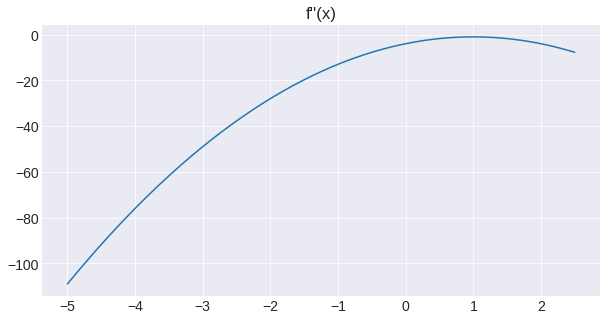

In [7]:
x = np.linspace(-5, 2.5, 200)
plt.figure(figsize = (10, 5))
plt.plot(x, f2(x))
plt.title("f''(x)")
plt.show()

In [8]:
# Metodo delle Tangenti
def metodo_tangenti(func, func1, a, threshold, max_iter, verbose):
    x = a
    for i in range(max_iter):
        y = func(x)
        if np.abs(y) < threshold:
            if verbose:
                print(f"# Iterazione: {i}, x = {c:.7f}, f'(x) = {y:.7f}")
            return x, i + 1
        y1 = func1(x)
        c = x - y/y1

        if verbose:
            print(f"# Iterazione: {i}, x = {c:.7f}, f'(x) = {y:.7f}, f''(x) = {y1:.7f}. Punto c calcolato: {c:.7f}")

        x = c # update the starting point
    print('Raggiunto il numero massimo di iterazioni')
    return x, i + 1

c, iters = metodo_tangenti(f1, f2, -5, 0.00001, 1000, True)
print(f'Valore: {c:.7f}')
print(f'Numero iterazioni: {iters}')

# Iterazione: 0, x = -2.9633028, f'(x) = 222.0000000, f''(x) = -109.0000000. Punto c calcolato: -2.9633028
# Iterazione: 1, x = -1.5872970, f'(x) = 66.2179457, f''(x) = -48.1233061. Punto c calcolato: -1.5872970
# Iterazione: 2, x = -0.6430490, f'(x) = 19.9069369, f''(x) = -21.0823174. Punto c calcolato: -0.6430490
# Iterazione: 3, x = 0.0250194, f'(x) = 6.0786402, f''(x) = -9.0988297. Punto c calcolato: 0.0250194
# Iterazione: 4, x = 0.5187635, f'(x) = 1.9017847, f''(x) = -3.8517616. Punto c calcolato: 0.5187635
# Iterazione: 5, x = 0.8684787, f'(x) = 0.5926853, f''(x) = -1.6947656. Punto c calcolato: 0.8684787
# Iterazione: 6, x = 0.9956744, f'(x) = 0.1337963, f''(x) = -1.0518935. Punto c calcolato: 0.9956744
# Iterazione: 7, x = 0.9999998, f'(x) = 0.0043257, f''(x) = -1.0000561. Punto c calcolato: 0.9999998
# Iterazione: 8, x = 0.9999998, f'(x) = 0.0000002
Valore: 0.9999998
Numero iterazioni: 9


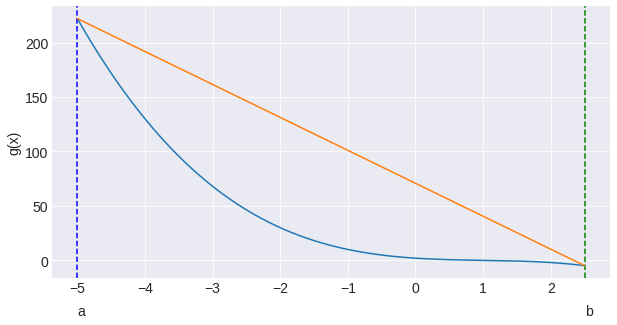

In [9]:
# secanti
x = np.linspace(-5, 2.5, 200)
plt.figure(figsize = (10, 5))
plt.plot(x, f1(x))
plt.axvline(x = -5, color = 'b', label = 'a', linestyle='--')
plt.axvline(x = 2.5, color = 'g', label = 'b', linestyle='--')
plt.text(-5,-50,'a')
plt.text(2.5,-50,'b')
plt.plot([-5, 2.5],[222, -4.875])
plt.ylabel('g(x)')
plt.show()

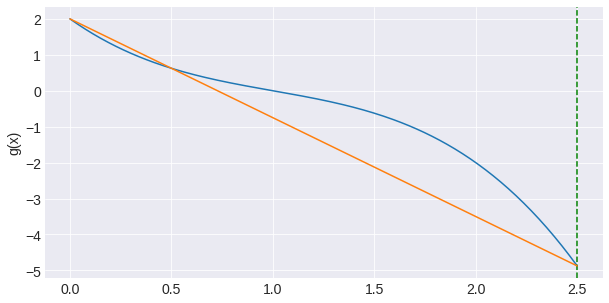

In [10]:
# secanti
x = np.linspace(0, 2.5, 200)
plt.figure(figsize = (10, 5))
plt.plot(x, f1(x))
plt.axvline(x = 2.5, color = 'g', linestyle='--')
plt.plot([0, 2.5],[2, -4.875])
plt.ylabel('g(x)')
plt.show()

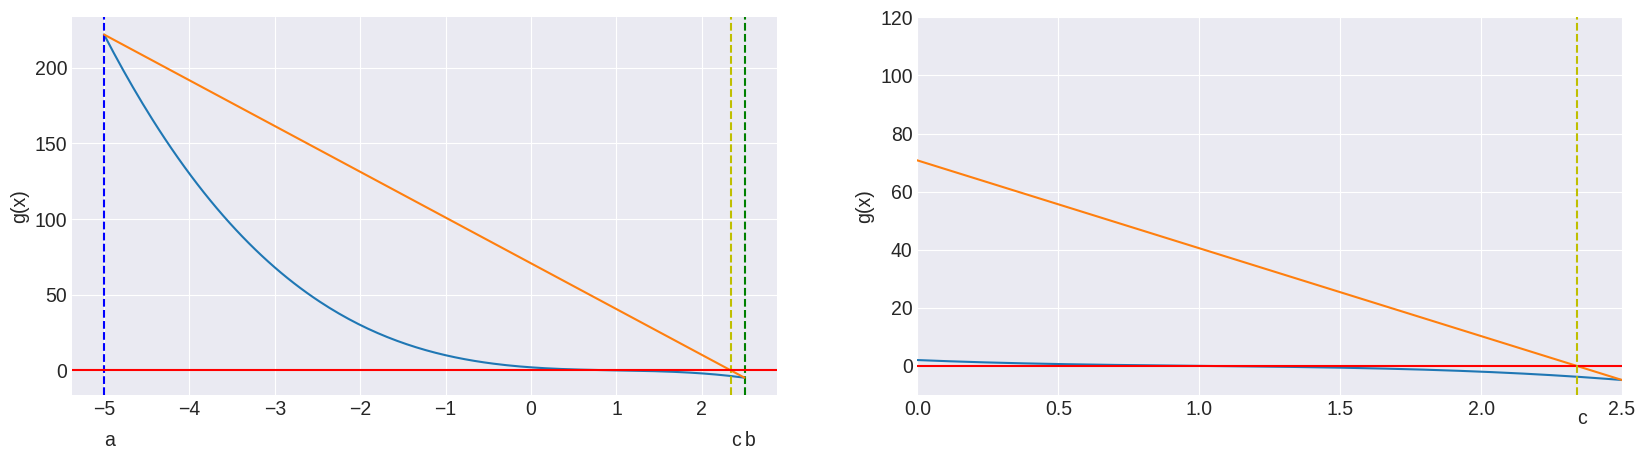

In [11]:
plt.rcParams["figure.figsize"] = (20,5)
plt.rcParams.update({'font.size': 14})
x = np.linspace(-5, 2.5, 200)
z = np.linspace(0, 2.5, 200)
fig, axs = plt.subplots(1, 2)

axs[0].plot(x, f1(x))
axs[0].axvline(x = -5, color = 'b', label = 'a', linestyle='--')
axs[0].axvline(x = 2.5, color = 'g', label = 'b', linestyle='--')
axs[0].axvline(x = 2.339, color = 'y', label = 'b', linestyle='--')
axs[0].text(-5,-50,'a')
axs[0].text(2.5,-50,'b')
axs[0].text(2.339,-50,'c')
axs[0].plot([-5, 2.5],[222, -4.875])
axs[0].axhline(y = 0, color = 'r', linestyle = '-')
axs[0].set_ylabel('g(x)')
axs[1].plot(z, f1(z))
axs[1].set_xlim([0, 2.5])
axs[1].set_ylim([-10, 120])
axs[1].plot([-5, 2.5],[222, -4.875])
axs[1].axhline(y = 0, color = 'r', linestyle = '-')
axs[1].axvline(x = 2.339, color = 'y', label = 'b', linestyle='--')
axs[1].set_ylabel('g(x)')
axs[1].text(2.339,-20,'c')
fig.set_dpi(100)
plt.show()

In [12]:
# Metodo delle Tangenti
def metodo_secanti(func, a, b, threshold, max_iter, verbose):
    ya = func(a)
    yb = func(b)

    x = b - ((b-a)/(yb - ya)) * yb

    for i in range(max_iter):
        y = func(x)
        if np.abs(y) < threshold:
            if verbose:
                print(f"# Iterazione: {i}, x = {x:.7f}, f'(x) = {y:.7f}")
            return c, i + 1

        c = x - ((x-a)/(y - ya)) * y

        if verbose:
            print(f"# Iterazione: {i}, x = {c:.7f}, f'(x) = {y:.7f}. Punto c calcolato: {c:.7f}")

        x = c # update the starting point

    print('Raggiunto il numero massimo di iterazioni')
    return x, i + 1

c, iters = metodo_secanti(f1, -5, 2.5, 0.00001, 1000, True)
print(f'Valore: {c:.7f}')
print(f'Numero iterazioni: {iters}')

# Iterazione: 0, x = 2.2172959, f'(x) = -3.7387197. Punto c calcolato: 2.2172959
# Iterazione: 1, x = 2.1203977, f'(x) = -3.0210964. Punto c calcolato: 2.1203977
# Iterazione: 2, x = 2.0402648, f'(x) = -2.5268228. Punto c calcolato: 2.0402648
# Iterazione: 3, x = 1.9722387, f'(x) = -2.1659882. Punto c calcolato: 1.9722387
# Iterazione: 4, x = 1.9133431, f'(x) = -1.8912456. Punto c calcolato: 1.9133431
# Iterazione: 5, x = 1.8615646, f'(x) = -1.6752499. Punto c calcolato: 1.8615646
# Iterazione: 6, x = 1.8154803, f'(x) = -1.5010983. Punto c calcolato: 1.8154803
# Iterazione: 7, x = 1.7740493, f'(x) = -1.3577813. Punto c calcolato: 1.7740493
# Iterazione: 8, x = 1.7364882, f'(x) = -1.2378228. Punto c calcolato: 1.7364882
# Iterazione: 9, x = 1.7021931, f'(x) = -1.1359702. Punto c calcolato: 1.7021931
# Iterazione: 10, x = 1.6706898, f'(x) = -1.0484272. Punto c calcolato: 1.6706898
# Iterazione: 11, x = 1.6415990, f'(x) = -0.9723828. Punto c calcolato: 1.6415990
# Iterazione: 12, x = 1.61